In [139]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score

### 보스톤
1) 상관관계 heatmap   
2) 정규화 후에 학습 (로우레벨, 하이레벨)   
3) 0번째 행의 예측값 구하시요     
4) 결정계수 확인   
5) cost의 plot 차트를 그리시오

In [140]:
boston = load_boston()
boston

C:\ProgramData\Anaconda3\envs\torchtest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [141]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [142]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [143]:
df = pd.DataFrame(boston['data'])
df.columns = boston['feature_names']
df['medv'] = boston['target']
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


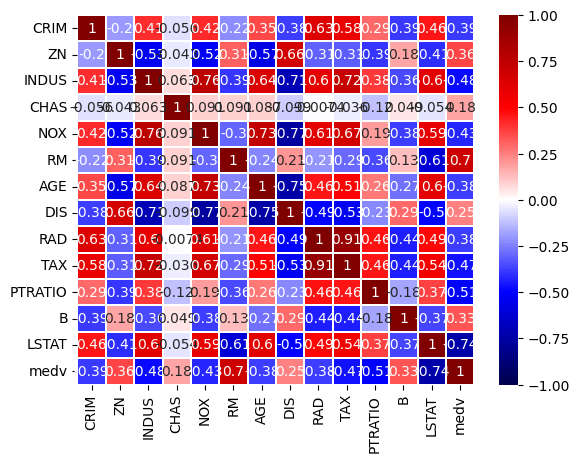

In [144]:
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True, 
           linewidths=0.2, cmap='seismic')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.show()

In [145]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]]

In [146]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [147]:
y_data

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


#### 정규화

In [148]:
scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)

In [149]:
x_dataN

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [150]:
scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform(y_data)

In [151]:
y_dataN

array([[0.42222222],
       [0.36888889],
       [0.66      ],
       [0.63111111],
       [0.69333333],
       [0.52666667],
       [0.39777778],
       [0.49111111],
       [0.25555556],
       [0.30888889],
       [0.22222222],
       [0.30888889],
       [0.37111111],
       [0.34222222],
       [0.29333333],
       [0.33111111],
       [0.40222222],
       [0.27777778],
       [0.33777778],
       [0.29333333],
       [0.19111111],
       [0.32444444],
       [0.22666667],
       [0.21111111],
       [0.23555556],
       [0.19777778],
       [0.25777778],
       [0.21777778],
       [0.29777778],
       [0.35555556],
       [0.17111111],
       [0.21111111],
       [0.18222222],
       [0.18      ],
       [0.18888889],
       [0.30888889],
       [0.33333333],
       [0.35555556],
       [0.43777778],
       [0.57333333],
       [0.66444444],
       [0.48      ],
       [0.45111111],
       [0.43777778],
       [0.36      ],
       [0.31777778],
       [0.33333333],
       [0.257

## 로우 레벨

In [152]:
x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_dataN)
x_len = len(x_dataN[0])
print('x_len: ', x_len)
w = torch.empty([x_len,1], requires_grad=True)
b = torch.empty(1, requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)

x_len:  13


tensor([0.5410], requires_grad=True)

In [153]:
def cost():
    hx = torch.matmul(x, w) + b
    c = torch.mean((hx-y)**2)
    return c

In [154]:
hist = []
optimizer = Adam([w, b], lr = 0.01)
for epoch in range(1000):
    c = cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    print(epoch, c.item())
    hist.append(c.item())

0 5.630882263183594
1 5.345588684082031
2 5.068064212799072
3 4.798434734344482
4 4.536820411682129
5 4.283322811126709
6 4.0380353927612305
7 3.8010358810424805
8 3.5723862648010254
9 3.352135419845581
10 3.140315294265747
11 2.936941385269165
12 2.7420132160186768
13 2.555511713027954
14 2.3774003982543945
15 2.2076261043548584
16 2.046117067337036
17 1.892783761024475
18 1.7475197315216064
19 1.6102004051208496
20 1.480684757232666
21 1.3588155508041382
22 1.2444188594818115
23 1.137306809425354
24 1.037276268005371
25 0.9441120028495789
26 0.8575856685638428
27 0.7774580717086792
28 0.7034806609153748
29 0.6353961229324341
30 0.5729398131370544
31 0.5158416628837585
32 0.46382731199264526
33 0.41661959886550903
34 0.3739400804042816
35 0.3355105519294739
36 0.30105432868003845
37 0.270298033952713
38 0.2429724484682083
39 0.2188141644001007
40 0.19756673276424408
41 0.17898158729076385
42 0.1628192961215973
43 0.14885026216506958
44 0.13685554265975952
45 0.12662751972675323
46 0.1

485 0.0233883336186409
486 0.02335871197283268
487 0.023329157382249832
488 0.023299671709537506
489 0.023270249366760254
490 0.023240888491272926
491 0.02321159653365612
492 0.023182367905974388
493 0.023153206333518028
494 0.023124100640416145
495 0.02309507131576538
496 0.023066096007823944
497 0.02303718775510788
498 0.023008350282907486
499 0.02297956869006157
500 0.022950854152441025
501 0.022922204807400703
502 0.022893618792295456
503 0.02286509983241558
504 0.02283663861453533
505 0.022808240726590157
506 0.022779911756515503
507 0.022751642391085625
508 0.02272343821823597
509 0.02269529551267624
510 0.022667216137051582
511 0.02263920195400715
512 0.02261125110089779
513 0.022583359852433205
514 0.022555535659193993
515 0.022527771070599556
516 0.022500069811940193
517 0.022472431883215904
518 0.02244485728442669
519 0.0224173441529274
520 0.022389894351363182
521 0.02236250787973404
522 0.022335181012749672
523 0.02230791747570038
524 0.02228071540594101
525 0.0222535748034

975 0.014886148273944855
976 0.014877396635711193
977 0.014868667349219322
978 0.014859961345791817
979 0.014851273037493229
980 0.014842608943581581
981 0.01483396627008915
982 0.014825343154370785
983 0.014816745184361935
984 0.014808167703449726
985 0.01479960884898901
986 0.014791074208915234
987 0.014782560989260674
988 0.014774065464735031
989 0.014765593223273754
990 0.014757142402231693
991 0.0147487111389637
992 0.014740301296114922
993 0.01473191287368536
994 0.01472354494035244
995 0.014715197496116161
996 0.014706871472299099
997 0.014698565937578678
998 0.014690281823277473
999 0.01468201819807291


#### Cost의 Plot 차트

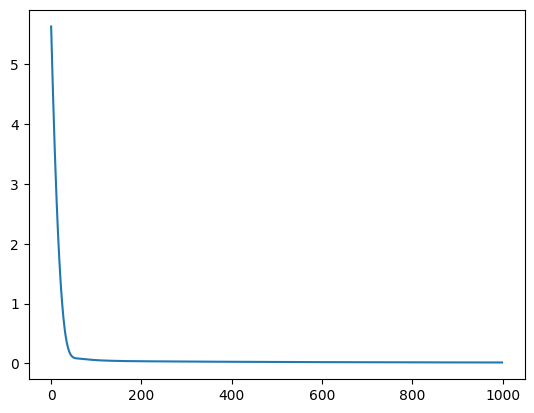

In [155]:
plt.plot(hist)
plt.show()

In [156]:
w

tensor([[-0.1677],
        [ 0.0053],
        [-0.2191],
        [ 0.0887],
        [ 0.0630],
        [ 0.6442],
        [ 0.0492],
        [-0.0497],
        [-0.1455],
        [ 0.2105],
        [-0.1041],
        [ 0.0153],
        [-0.3638]], requires_grad=True)

In [157]:
b

tensor([0.2209], requires_grad=True)

In [158]:
def hxFn(xd):
    xd = torch.FloatTensor(xd)
    hx = torch.matmul(xd, w) + b
    return hx.detach().numpy()

#### 0번쨰 행의 예측값

In [159]:
p = hxFn(x[0].reshape(1,x_len))
scaleL.inverse_transform(p)

array([[32.610027]], dtype=float32)

In [160]:
y_data['medv'][0]

24.0

In [200]:
pred = hxFn(x)
pred

array([[ 0.61355615],
       [ 0.4519208 ],
       [ 0.5883483 ],
       [ 0.57708895],
       [ 0.5757632 ],
       [ 0.4907084 ],
       [ 0.39822733],
       [ 0.36364356],
       [ 0.189519  ],
       [ 0.3549772 ],
       [ 0.372877  ],
       [ 0.39466256],
       [ 0.3364361 ],
       [ 0.37226218],
       [ 0.3822689 ],
       [ 0.3541749 ],
       [ 0.37069875],
       [ 0.3244083 ],
       [ 0.2638472 ],
       [ 0.32215172],
       [ 0.2179358 ],
       [ 0.33475634],
       [ 0.30839938],
       [ 0.2601818 ],
       [ 0.30589482],
       [ 0.2554894 ],
       [ 0.3034228 ],
       [ 0.30453238],
       [ 0.4111215 ],
       [ 0.43809742],
       [ 0.2153315 ],
       [ 0.3590691 ],
       [ 0.1828585 ],
       [ 0.25888622],
       [ 0.28362277],
       [ 0.3812338 ],
       [ 0.34818137],
       [ 0.36398017],
       [ 0.3590067 ],
       [ 0.51473385],
       [ 0.5881263 ],
       [ 0.48315954],
       [ 0.4010058 ],
       [ 0.390173  ],
       [ 0.36830074],
       [ 0

In [198]:
np_y = y.detach().numpy()

tensor([[0.4222],
        [0.3689],
        [0.6600],
        [0.6311],
        [0.6933],
        [0.5267],
        [0.3978],
        [0.4911],
        [0.2556],
        [0.3089],
        [0.2222],
        [0.3089],
        [0.3711],
        [0.3422],
        [0.2933],
        [0.3311],
        [0.4022],
        [0.2778],
        [0.3378],
        [0.2933],
        [0.1911],
        [0.3244],
        [0.2267],
        [0.2111],
        [0.2356],
        [0.1978],
        [0.2578],
        [0.2178],
        [0.2978],
        [0.3556],
        [0.1711],
        [0.2111],
        [0.1822],
        [0.1800],
        [0.1889],
        [0.3089],
        [0.3333],
        [0.3556],
        [0.4378],
        [0.5733],
        [0.6644],
        [0.4800],
        [0.4511],
        [0.4378],
        [0.3600],
        [0.3178],
        [0.3333],
        [0.2578],
        [0.2089],
        [0.3200],
        [0.3267],
        [0.3444],
        [0.4444],
        [0.4089],
        [0.3089],
        [0

#### 결정계수 값

In [201]:
r2_score(np_y, pred)

0.648015339634927

## 하이 레벨

#### 데이터 재 초기화
#### 정규화

In [167]:
x_data = df.iloc[:,:-1]
y_data = df.iloc[:,[-1]]

scaleF = MinMaxScaler()
x_dataN = scaleF.fit_transform(x_data)

scaleL = MinMaxScaler()
y_dataN = scaleL.fit_transform(y_data)


x = torch.FloatTensor(x_dataN)
y = torch.FloatTensor(y_dataN)
x_len = len(x_dataN[0])
print('x_len: ', x_len)

x_len:  13


In [168]:
model = Sequential()
model.add_module('nn1', Linear(x_len, 1))
loss_fn = MSELoss()
hist=[]
optimizer = Adam(model.parameters(), lr=0.1)

In [169]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0290, -0.1152, -0.0431,  0.2220,  0.1880,  0.1942, -0.1564,  0.0024,
          -0.2432,  0.1148,  0.0088, -0.2677, -0.1300]], requires_grad=True),
 Parameter containing:
 tensor([-0.2426], requires_grad=True)]

In [170]:
for step in range(1000):
    optimizer.zero_grad()
    hx = model.forward(x) # matmul (x, w) + b # model(x) 가능
    cost = loss_fn(hx, y)
    cost.backward()
    optimizer.step()
    print(step, cost.item())
    hist.append(cost.item())

0 0.8509405851364136
1 0.15645477175712585
2 0.1547705978155136
3 0.35685843229293823
4 0.3651553690433502
5 0.22473812103271484
6 0.08424320816993713
7 0.03593425825238228
8 0.08114593476057053
9 0.15036365389823914
10 0.17453327775001526
11 0.14038050174713135
12 0.0814669281244278
13 0.04052221402525902
14 0.03932582959532738
15 0.067851722240448
16 0.09631142765283585
17 0.10064639896154404
18 0.0791068822145462
19 0.048629406839609146
20 0.02930702269077301
21 0.030039383098483086
22 0.04398282244801521
23 0.055900271981954575
24 0.05495358631014824
25 0.04213894531130791
26 0.027455421164631844
27 0.02092375047504902
28 0.02500542625784874
29 0.03374071419239044
30 0.03858301416039467
31 0.03554069995880127
32 0.02759549580514431
33 0.021167414262890816
34 0.02040269412100315
35 0.024134930223226547
36 0.027643246576189995
37 0.027169840410351753
38 0.022978220134973526
39 0.018518976867198944
40 0.016990328207612038
41 0.018612917512655258
42 0.020884936675429344
43 0.0212130900

504 0.010816451162099838
505 0.010816368274390697
506 0.010816287249326706
507 0.010816208086907864
508 0.010816128924489021
509 0.010816054418683052
510 0.010815979912877083
511 0.010815906338393688
512 0.010815833695232868
513 0.010815761983394623
514 0.010815693996846676
515 0.010815626941621304
516 0.010815557092428207
517 0.010815492831170559
518 0.01081542856991291
519 0.010815365239977837
520 0.010815301910042763
521 0.010815240442752838
522 0.010815181769430637
523 0.010815122164785862
524 0.010815064422786236
525 0.010815009474754333
526 0.010814952664077282
527 0.010814899578690529
528 0.010814845561981201
529 0.010814793407917023
530 0.010814742185175419
531 0.010814690962433815
532 0.010814642533659935
533 0.010814592242240906
534 0.01081454660743475
535 0.010814500972628593
536 0.010814453475177288
537 0.010814408771693707
538 0.010814364068210125
539 0.010814321227371693
540 0.01081427838653326
541 0.010814239270985126
542 0.010814196430146694
543 0.01081415731459856
544 

In [171]:
model[0].weight

Parameter containing:
tensor([[-0.2135,  0.1032,  0.0125,  0.0597, -0.1919,  0.4419,  0.0015, -0.3606,
          0.1564, -0.1436, -0.1990,  0.0821, -0.4226]], requires_grad=True)

In [172]:
model[0].bias

Parameter containing:
tensor([0.4804], requires_grad=True)

#### Cost의 Plot 차트

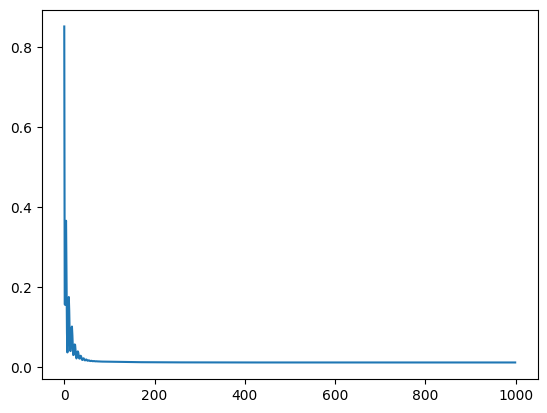

In [173]:
plt.plot(hist)
plt.show()

In [182]:
p = model.forward(x[0].reshape(1,x_len))

#### 0번째 행의 예측값

In [202]:
scaleL.inverse_transform(p.detach().numpy())

array([[30.00374]], dtype=float32)

In [183]:
df['medv'][0]

24.0

In [196]:
pred = model.forward(x)
np_pred = pred.detach().numpy()
np_y = y.detach().numpy()

#### 결정계수 값

In [197]:
r2_score(np_y, np_pred)

0.7406426637929604